In [1]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


1.Load the Data and Library

2.Quick Data Visualization

3.Divide the Data inside X and Y(Image,Label)

4.Divide Data into Train and Test

5.Apply ML Alogorithm to Evaluvate

6.apply Single Layer Persptron

7.apply Multi Layer Persptron

8.:implement Deep Learning using TensorFlow and Keras





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


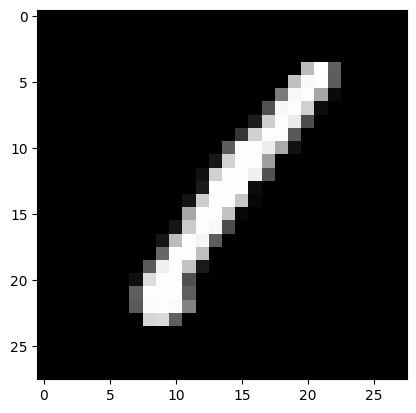

In [6]:
feature=["pixel{}".format(pixel_num)for pixel_num in range(0,784)]
rows_to_examine=0
image_data=np.reshape(train[feature][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
plt.imshow(image_data,cmap='gray')
plt.show()

We can't do EDA.It is useless in this data

We are going to divide the data

In [7]:
x=train.drop('label',axis=1)
y=train['label']

In [8]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [11]:
x=train.drop('label',axis=1)
y=train['label']

In [12]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [14]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [16]:
def model_eval(actual,predicted):
  accuracy_score_value=accuracy_score(actual,predicted)
  classification_report_value=classification_report(actual,predicted)
  confusion_matrix_value=confusion_matrix(actual,predicted)
  print("Accuracy Score:{}".format(accuracy_score_value))
  print("Classification Report:{}".format(classification_report_value))
  print("Confusion Matrix:{}".format(confusion_matrix_value))

In [17]:
model_eval(y_train,y_hat_train_rf)

Accuracy Score:1.0
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      1.00      1.00      3321
           3       1.00      1.00      1.00      3495
           4       1.00      1.00      1.00      3246
           5       1.00      1.00      1.00      3022
           6       1.00      1.00      1.00      3350
           7       1.00      1.00      1.00      3532
           8       1.00      1.00      1.00      3227
           9       1.00      1.00      1.00      3333

    accuracy                           1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600

Confusion Matrix:[[3336    0    0    0    0    0    0    0    0    0]
 [   0 3738    0    0    0    0    0    0    0    0]
 [   0    0 3321    0    0    0    0    0    0    0]
 [   0    0    0 3495   

In [18]:
gb=GradientBoostingClassifier(n_estimators=15)
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=15)

In [19]:
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [20]:
def model_eval(actual,predicted):
  accuracy_score_value=accuracy_score(actual,predicted)
  classification_report_value=classification_report(actual,predicted)
  confusion_matrix_value=confusion_matrix(actual,predicted)
  print("Accuracy Score:{}".format(accuracy_score_value))
  print("Classification Report:{}".format(classification_report_value))
  print("Confusion Matrix:{}".format(confusion_matrix_value))

In [21]:
model_eval(y_train,y_hat_train_gb)

Accuracy Score:0.869077380952381
Classification Report:              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3336
           1       0.91      0.95      0.93      3738
           2       0.90      0.87      0.89      3321
           3       0.83      0.84      0.83      3495
           4       0.84      0.88      0.86      3246
           5       0.88      0.76      0.82      3022
           6       0.93      0.89      0.91      3350
           7       0.90      0.86      0.88      3532
           8       0.81      0.82      0.82      3227
           9       0.78      0.84      0.81      3333

    accuracy                           0.87     33600
   macro avg       0.87      0.87      0.87     33600
weighted avg       0.87      0.87      0.87     33600

Confusion Matrix:[[3190    1    5   15   14    9   13    3   82    4]
 [   1 3563   28   51    3   14   27    8   39    4]
 [  62   49 2896   65   54    6   47   40   79   23]
 [  25   6

In [22]:
def model_eval(actual,predicted):
  accuracy_score_value=accuracy_score(actual,predicted)
  classification_report_value=classification_report(actual,predicted)
  confusion_matrix_value=confusion_matrix(actual,predicted)
  print("Accuracy Score:{}".format(accuracy_score_value))
  print("Classification Report:{}".format(classification_report_value))
  print("Confusion Matrix:{}".format(confusion_matrix_value))

In [23]:
 model_eval(y_test,y_hat_test_gb)

Accuracy Score:0.8628571428571429
Classification Report:              precision    recall  f1-score   support

           0       0.91      0.95      0.93       796
           1       0.90      0.96      0.93       946
           2       0.89      0.85      0.87       856
           3       0.82      0.84      0.83       856
           4       0.83      0.89      0.86       826
           5       0.89      0.75      0.81       773
           6       0.91      0.87      0.89       787
           7       0.91      0.87      0.89       869
           8       0.81      0.78      0.79       836
           9       0.78      0.85      0.82       855

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400

Confusion Matrix:[[758   1   1   3   2   1   3   1  20   6]
 [  0 907   6   9   2   3   8   2   9   0]
 [ 15   9 729  18  17   2  16  14  27   9]
 [  7   7  37 721   4  16   9  10  21  

perceptron

singel layer perceptorn is linear model
But the data is non_linear

In [26]:
per =Perceptron()
per.fit(x_train, y_train)
y_hat_train_per=per.predict(x_train)
y_hat_test_per=per.predict(x_test)

In [27]:
def model_eval(actual,predicted):
  accuracy_score_value=accuracy_score(actual,predicted)
  classification_report_value=classification_report(actual,predicted)
  confusion_matrix_value=confusion_matrix(actual,predicted)
  print("Accuracy Score:{}".format(accuracy_score_value))
  print("Classification Report:{}".format(classification_report_value))
  print("Confusion Matrix:{}".format(confusion_matrix_value))

In [28]:
model_eval(y_train,y_hat_train_per)

Accuracy Score:0.8897619047619048
Classification Report:              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3336
           1       0.93      0.98      0.95      3738
           2       0.91      0.86      0.89      3321
           3       0.91      0.83      0.87      3495
           4       0.87      0.93      0.90      3246
           5       0.92      0.72      0.81      3022
           6       0.86      0.98      0.92      3350
           7       0.93      0.91      0.92      3532
           8       0.74      0.88      0.80      3227
           9       0.89      0.80      0.84      3333

    accuracy                           0.89     33600
   macro avg       0.89      0.89      0.89     33600
weighted avg       0.89      0.89      0.89     33600

Confusion Matrix:[[3245    0    8    3    5    5   35    0   34    1]
 [   0 3661   13    3    3    2    6    3   42    5]
 [  13   53 2871   25   31    5  125   32  157    9]
 [  13   

multi layer perceptron

In [29]:
from sklearn.neural_network import MLPClassifier

Increase the neuron 32,62,128,256,512 more than
Create a new hidden layer

In [30]:
mlp=MLPClassifier(hidden_layer_sizes=(64,64,64),random_state= 10,verbose= 1)
mlp.fit(x_train,y_train)
y_hat_train_mlp=mlp.predict(x_train)
y_hat_test_mlp=mlp.predict(x_test)


Iteration 1, loss = 2.92790823
Iteration 2, loss = 0.61130416
Iteration 3, loss = 0.38984193
Iteration 4, loss = 0.29756884
Iteration 5, loss = 0.24079396
Iteration 6, loss = 0.19795728
Iteration 7, loss = 0.16671323
Iteration 8, loss = 0.15004896
Iteration 9, loss = 0.13379428
Iteration 10, loss = 0.11437175
Iteration 11, loss = 0.10237632
Iteration 12, loss = 0.08855856
Iteration 13, loss = 0.08247361
Iteration 14, loss = 0.08460366
Iteration 15, loss = 0.07807670
Iteration 16, loss = 0.06959152
Iteration 17, loss = 0.07807428
Iteration 18, loss = 0.07039426
Iteration 19, loss = 0.06856918
Iteration 20, loss = 0.05882026
Iteration 21, loss = 0.05527884
Iteration 22, loss = 0.05911925
Iteration 23, loss = 0.06163009
Iteration 24, loss = 0.05482740
Iteration 25, loss = 0.06275743
Iteration 26, loss = 0.04681039
Iteration 27, loss = 0.04495617
Iteration 28, loss = 0.04678297
Iteration 29, loss = 0.05041975
Iteration 30, loss = 0.04576628
Iteration 31, loss = 0.06041460
Iteration 32, los

In [31]:
model_eval(y_train,y_hat_train_mlp)

Accuracy Score:0.9939285714285714
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       0.99      1.00      0.99      3321
           3       0.99      0.99      0.99      3495
           4       0.99      0.99      0.99      3246
           5       1.00      0.99      1.00      3022
           6       1.00      1.00      1.00      3350
           7       0.99      1.00      0.99      3532
           8       0.99      0.99      0.99      3227
           9       0.99      0.98      0.99      3333

    accuracy                           0.99     33600
   macro avg       0.99      0.99      0.99     33600
weighted avg       0.99      0.99      0.99     33600

Confusion Matrix:[[3327    1    0    0    1    1    2    1    3    0]
 [   0 3736    0    0    0    0    1    1    0    0]
 [   0    1 3315    1    0    0    0    2    2    0]
 [   0   

In [32]:
model_eval(y_test,y_hat_test_mlp)

Accuracy Score:0.9595238095238096
Classification Report:              precision    recall  f1-score   support

           0       0.97      0.98      0.98       796
           1       0.98      0.99      0.99       946
           2       0.94      0.97      0.95       856
           3       0.95      0.95      0.95       856
           4       0.96      0.96      0.96       826
           5       0.97      0.93      0.95       773
           6       0.96      0.98      0.97       787
           7       0.96      0.96      0.96       869
           8       0.94      0.93      0.93       836
           9       0.96      0.94      0.95       855

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Matrix:[[780   1   1   0   0   1   5   1   4   3]
 [  0 934   3   0   2   2   0   2   3   0]
 [  1   0 830   2   3   0   5   7   8   0]
 [  2   2  15 809   0   8   0   2  15  

* declare the dat

   * sequential :sequence of layer

   * function:multi model /train

* declare the layer

  * dence,dropout

  * number of neuron,act function

* compile the model

  * Optimizer(SGD,Adam)

  * Loss Function(CROSS ENTROPY,RMSE,MSE)

  * Metric(aCCURACY,F1,Precision,Recall)

* fit the model

  * pass x_train and y_train

  * pass x test and y_test

  * epochs

  * batch size
  
* predict and evalute model

In [33]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical

One Hot Encoder

In [34]:
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)
#

In [35]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [36]:
y_test_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [37]:
model= Sequential()
model.add(Dense(64,activation='relu',input_shape=(784,)))#layer1
model.add(Dense(64,activation='relu'))#layer2
model.add(Dense(64,activation='relu'))#layer3
model.add(Dense(10,activation='softmax'))#output layer
model.add


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Sequential.add of <Sequential name=sequential, built=True>>

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [39]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fit the model

In [40]:
hist=model.fit(x_train,y_train_ohe,batch_size=128,epochs=100,validation_data=(x_test,y_test_ohe))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6163 - loss: 8.1186 - val_accuracy: 0.8404 - val_loss: 0.8400
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8674 - loss: 0.5922 - val_accuracy: 0.8843 - val_loss: 0.5135
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9083 - loss: 0.3526 - val_accuracy: 0.8925 - val_loss: 0.4579
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9284 - loss: 0.2590 - val_accuracy: 0.9149 - val_loss: 0.3452
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9407 - loss: 0.2108 - val_accuracy: 0.9260 - val_loss: 0.3058
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9513 - loss: 0.1718 - val_accuracy: 0.9299 - val_loss: 0.2944
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9582 - loss: 0.1351 - val_accuracy: 0.9345 - val_loss: 0.2855
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9633 - loss: 0.1207 - val_accu

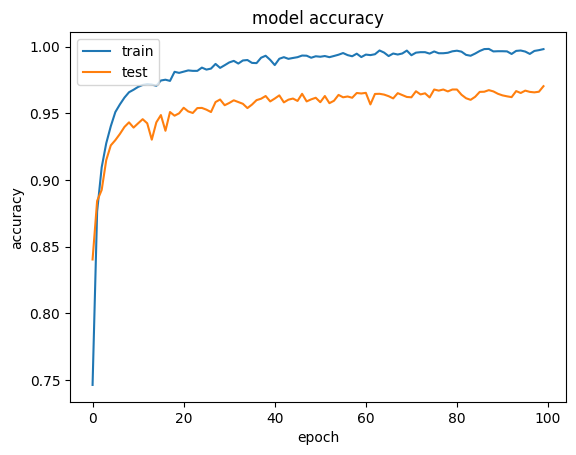

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

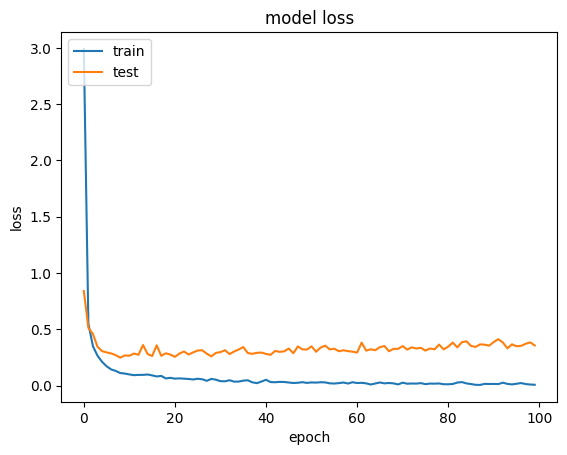

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

Model Evaluation

In [43]:
y_hat_train_dense=np.argmax(model.predict(x_train),axis=1)
y_hat_test_dense=np.argmax(model.predict(x_test),axis=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
y_hat_train_dense

array([4, 7, 7, ..., 5, 6, 0])

In [45]:
y_hat_test_dense

array([7, 3, 9, ..., 6, 4, 1])

In [46]:
def model_eval(actual,predicted):
  accuracy_score_value=accuracy_score(actual,predicted)
  classification_report_value=classification_report(actual,predicted)
  confusion_matrix_value=confusion_matrix(actual,predicted)
  print("Accuracy Score:{}".format(accuracy_score_value))
  print("Classification Report:{}".format(classification_report_value))
  print("Confusion Matrix:{}".format(confusion_matrix_value))



---



---



In [48]:
model_eval(y_test,y_hat_test_dense)

Accuracy Score:0.9703571428571428
Classification Report:              precision    recall  f1-score   support

           0       0.98      0.98      0.98       796
           1       0.99      0.99      0.99       946
           2       0.97      0.98      0.97       856
           3       0.95      0.96      0.95       856
           4       0.97      0.98      0.97       826
           5       0.97      0.95      0.96       773
           6       0.98      0.98      0.98       787
           7       0.98      0.97      0.97       869
           8       0.94      0.96      0.95       836
           9       0.98      0.95      0.96       855

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Confusion Matrix:[[783   0   0   1   2   0   7   0   2   1]
 [  0 934   4   2   1   0   0   3   2   0]
 [  2   0 838   3   4   1   0   4   4   0]
 [  2   0   6 821   0  15   0   1  10  

In [47]:
model= Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,)))#layer1
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))#layer2
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))#layer3
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))#output layer
model.add


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Sequential.add of <Sequential name=sequential_1, built=True>>

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
hist=model.fit(x_train,y_train_ohe,batch_size=128,epochs=100,validation_data=(x_test,y_test_ohe))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6161 - loss: 12.2877 - val_accuracy: 0.8917 - val_loss: 0.3985
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8397 - loss: 0.6472 - val_accuracy: 0.9210 - val_loss: 0.2871
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8832 - loss: 0.4271 - val_accuracy: 0.9331 - val_loss: 0.2375
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9072 - loss: 0.3295 - val_accuracy: 0.9449 - val_loss: 0.2078
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9264 - loss: 0.2568 - val_accuracy: 0.9462 - val_loss: 0.1984
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9328 - loss: 0.2367 - val_accuracy: 0.9530 - val_loss: 0.1765
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9414 - loss: 0.2056 - val_accuracy: 0.9557 - val_loss: 0.1610
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9451 - loss: 0.1903 -

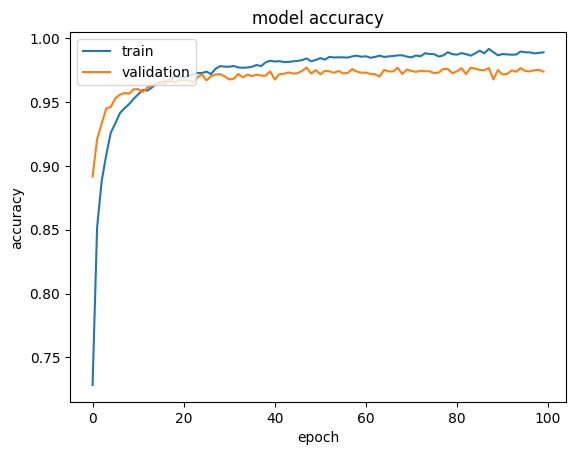

In [52]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

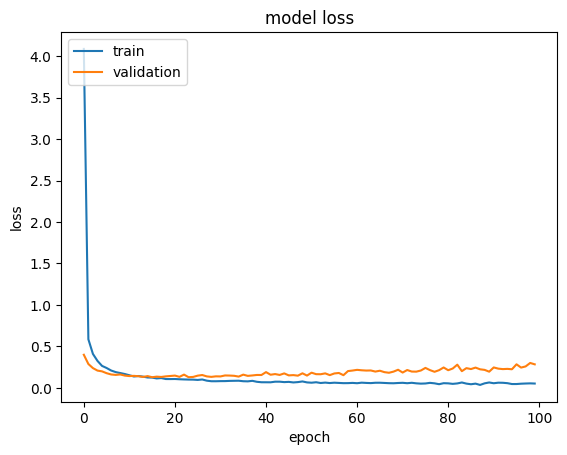

In [53]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [54]:
y_hat_train_dense=np.argmax(model.predict(x_train),axis=1)
y_hat_test_dense=np.argmax(model.predict(x_test),axis=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [55]:
y_hat_train_dense

array([4, 7, 7, ..., 5, 6, 0])

In [56]:
y_hat_test_dense

array([7, 3, 9, ..., 6, 4, 1])

In [57]:
model_eval(y_train,y_hat_train_dense)

Accuracy Score:0.9972619047619048
Classification Report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      1.00      1.00      3321
           3       1.00      0.99      1.00      3495
           4       1.00      1.00      1.00      3246
           5       1.00      1.00      1.00      3022
           6       1.00      1.00      1.00      3350
           7       1.00      1.00      1.00      3532
           8       0.99      1.00      0.99      3227
           9       1.00      1.00      1.00      3333

    accuracy                           1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600

Confusion Matrix:[[3320    0    0    0    0    0    3    0   13    0]
 [   0 3732    0    0    0    0    1    2    3    0]
 [   0    0 3314    2    0    0    0    1    4    0]
 [   0   

In [58]:
model_eval(y_test,y_hat_test_dense)

Accuracy Score:0.9738095238095238
Classification Report:              precision    recall  f1-score   support

           0       0.99      0.97      0.98       796
           1       0.98      0.99      0.99       946
           2       0.96      0.99      0.97       856
           3       0.96      0.97      0.97       856
           4       0.97      0.98      0.97       826
           5       0.97      0.97      0.97       773
           6       0.98      0.99      0.98       787
           7       0.98      0.96      0.97       869
           8       0.96      0.96      0.96       836
           9       0.98      0.96      0.97       855

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Confusion Matrix:[[776   0   0   1   2   0   3   1  10   3]
 [  0 938   1   1   2   0   0   1   2   1]
 [  1   3 844   2   2   0   0   1   3   0]
 [  1   0   8 832   0   8   0   1   6  